# Pre-processing

## Imports

In [216]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [217]:
df = pd.read_csv("datasets/after_eda_walmart.csv")
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [218]:
date_df = pd.read_csv("datasets/after_eda_date.csv")
date_df.head()

,date,weekday,month,year
0,2010-05-02,6,5,2010
1,2010-12-02,3,12,2010
2,2010-02-19,4,2,2010
3,2010-02-26,4,2,2010
4,2010-05-03,0,5,2010


In [219]:
df[["weekday","month","year"]] = date_df[["weekday","month","year"]]
df

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,3,5,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,0,12,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4,10,2012


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   weekly_sales  6435 non-null   float64
 2   holiday_flag  6435 non-null   int64  
 3   temperature   6435 non-null   float64
 4   fuel_price    6435 non-null   float64
 5   cpi           6435 non-null   float64
 6   unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   year          6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [221]:
df.nunique().sort_values()

holiday_flag       2
year               3
weekday            7
month             12
store             45
unemployment     349
fuel_price       892
cpi             2145
temperature     3528
weekly_sales    6435
dtype: int64

In [222]:
# Numerical and categorical features
target = "weekly_sales"
features = [i for i in df.columns if i != target]
unique_count = df[features].nunique().sort_values()

numerical_features = []
categorical_features = []

for feature in features:
    if unique_count[feature] <= 45:
        categorical_features.append(feature)
    else:
        numerical_features.append(feature)

print("There are {} numerical & {} categorical features.".format(len(numerical_features),len(categorical_features)))

There are 4 numerical & 5 categorical features.


In [223]:
df.describe()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000


## Pairplot

In [224]:
# # Understanding the relationship between all the features
# g = sns.pairplot(df)
# plt.title("Pairplots for all the Feature")
# g.map_upper(sns.kdeplot,levels=4,color=".2")
# plt.show()

**Note:**
- This pairplot takes a significant amount of time to run so it was run once then saved as an image which is referenced in the output below.

**Output:**
![Pairplot](raw_data/pairplot.png)

## Data pre-processing

In [225]:
# Removal of any duplicate rows
original_df = df.copy()
df.drop_duplicates(inplace=True)

if df.shape == original_df.shape:
    print("The dataset doesn\'t have any duplicates")
else:
    print(f"The number of duplicates dropped/fixed ---> {original_df.shape[0] - df.shape[0]}")

The dataset doesn't have any duplicates


In [226]:
# Check for empty elements
null_value_count = pd.DataFrame(df.isnull().sum().sort_values(),columns=["Total Null Values"])
null_value_count["Percentage"] = round(null_value_count["Total Null Values"]/df.shape[0],3)*100
null_value_count

,Total Null Values,Percentage
store,0,0.0
weekly_sales,0,0.0
holiday_flag,0,0.0
temperature,0,0.0
fuel_price,0,0.0
cpi,0,0.0
unemployment,0,0.0
weekday,0,0.0
month,0,0.0
year,0,0.0


In [227]:
# Removal of outliers
df_no_outliers = df.copy()

for i in numerical_features:
    Q1 = df_no_outliers[i].quantile(0.25)
    Q3 = df_no_outliers[i].quantile(0.75)
    IQR = Q3 - Q1
    df_no_outliers = df_no_outliers[df_no_outliers[i] <= (Q3+(1.5*IQR))]
    df_no_outliers = df_no_outliers[df_no_outliers[i] >= (Q1-(1.5*IQR))]
    df_no_outliers = df_no_outliers.reset_index(drop=True)

print("NOTE:")
print("Before removal of outliers,The dataset had {} samples.".format(df_one_hot.shape[0]))
print("After removal of outliers,The dataset now has {} samples.".format(df_no_outliers.shape[0]))
display(df_no_outliers)

NOTE:
Before removal of outliers,The dataset had 5951 samples.
After removal of outliers,The dataset now has 5951 samples.


,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010
...,...,...,...,...,...,...,...,...,...,...
5946,45,713173.95,0,64.88,3.997,192.013558,8.684,4,9,2012
5947,45,733455.07,0,64.89,3.985,192.170412,8.667,3,5,2012
5948,45,734464.36,0,54.47,4.000,192.327265,8.667,0,12,2012
5949,45,718125.53,0,56.47,3.969,192.330854,8.667,4,10,2012


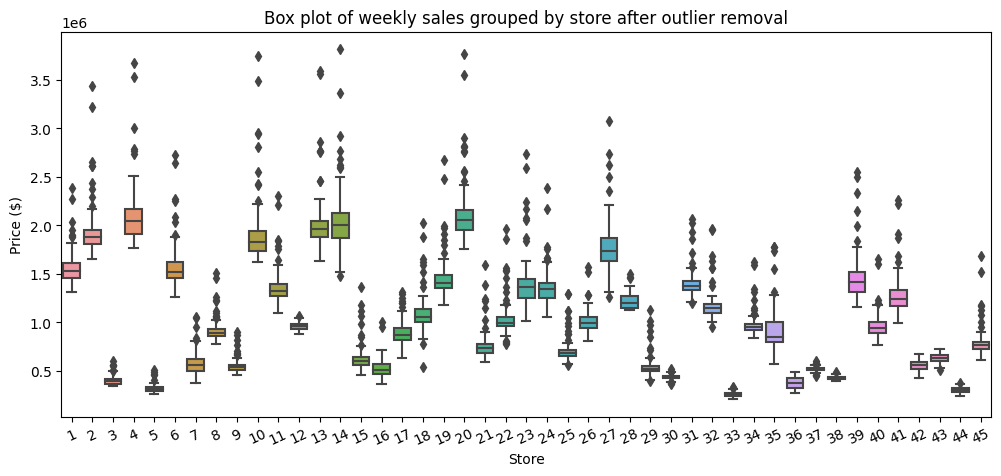

In [228]:
# Boxplot following the removal of outliers
plt.subplots(figsize=(12,5))
sns.boxplot(x="store",y="weekly_sales",data=df_no_outliers)
plt.xticks(rotation=25)
plt.title("Box plot of weekly sales grouped by store after outlier removal")
plt.ylabel("Price ($)")
plt.xlabel("Store")
plt.show()

In [229]:
# One-Hot Binay Encoding
df_one_hot = df_no_outliers.copy()

for i in categorical_features:
    if df_one_hot[i].nunique() == 2:
        print("One-Hot Encoding on feature --> ",i)
        df_one_hot[i] = pd.get_dummies(df_one_hot[i],drop_first=True,prefix=str(i))
    if (df_one_hot[i].nunique()>2):
        print("Dummy Encoding on feature --> ",i)
        df_one_hot=pd.concat([df_one_hot.drop([i],axis=1),
                              pd.DataFrame(pd.get_dummies(df_one_hot[i],drop_first=True,prefix=str(i)))],axis=1)

display(df_one_hot)

Dummy Encoding on feature -->  store
One-Hot Encoding on feature -->  holiday_flag
Dummy Encoding on feature -->  weekday
Dummy Encoding on feature -->  month
Dummy Encoding on feature -->  year


,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,store_2,store_3,store_4,store_5,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
0,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5946,713173.95,0,64.88,3.997,192.013558,8.684,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5947,733455.07,0,64.89,3.985,192.170412,8.667,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5948,734464.36,0,54.47,4.000,192.327265,8.667,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5949,718125.53,0,56.47,3.969,192.330854,8.667,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [230]:
print(df_one_hot.columns)

Index(['weekly_sales', 'holiday_flag', 'temperature', 'fuel_price', 'cpi',
       'unemployment', 'store_2', 'store_3', 'store_4', 'store_5', 'store_6',
       'store_7', 'store_8', 'store_9', 'store_10', 'store_11', 'store_12',
       'store_13', 'store_14', 'store_15', 'store_16', 'store_17', 'store_18',
       'store_19', 'store_20', 'store_21', 'store_22', 'store_23', 'store_24',
       'store_25', 'store_26', 'store_27', 'store_28', 'store_29', 'store_30',
       'store_31', 'store_32', 'store_33', 'store_34', 'store_35', 'store_36',
       'store_37', 'store_38', 'store_39', 'store_40', 'store_41', 'store_42',
       'store_43', 'store_44', 'store_45', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'year_2011',
       'year_2012'],
      dtype='object')


In [231]:
# Final dataset size after preprocessing
df = df_one_hot.copy()

number_of_dropped_rows = original_df.shape[0]-df.shape[0]
percentage_of_dropped_rows = (number_of_dropped_rows/original_df.shape[0]) * 100
percentage_of_dropped_rows = round(percentage_of_dropped_rows,2)

print("NOTE:")
print(f"After cleaning, {number_of_dropped_rows} or {percentage_of_dropped_rows}% of the samples were dropped.")
display(df)

NOTE:
After cleaning, 484 or 7.52% of the samples were dropped.


,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,store_2,store_3,store_4,store_5,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
0,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5946,713173.95,0,64.88,3.997,192.013558,8.684,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5947,733455.07,0,64.89,3.985,192.170412,8.667,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5948,734464.36,0,54.47,4.000,192.327265,8.667,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5949,718125.53,0,56.47,3.969,192.330854,8.667,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


## Splitting and Standardization

In [232]:
# Training and testing sets
X = df.drop(target,axis=1)
y = df[target]
Train_X,Test_X,Train_y,Test_y = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print("Original set  ---> ",X.shape,y.shape,
      "\nTraining set  ---> ",Train_X.shape,Train_y.shape,
      "\nTesting set   ---> ",Test_X.shape,Test_y.shape)

Original set  --->  (5951, 68) (5951,) 
Training set  --->  (4760, 68) (4760,) 
Testing set   --->  (1191, 68) (1191,)


In [233]:
# Standardization/scaling of features
std = StandardScaler()

print("Scaling on training set")
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std,columns=X.columns)
display(Train_X_std.describe())

print("\n","Scaling on test set")
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std,columns=X.columns)
display(Test_X_std.describe())

Scaling on training set


,holiday_flag,temperature,fuel_price,cpi,unemployment,store_2,store_3,store_4,store_5,store_6,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
count,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,...,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03
mean,-2.836200e-17,3.381049e-16,-2.573105e-16,-1.970413e-16,1.470346e-16,-2.612289e-17,2.612289e-17,-1.492737e-17,1.604692e-17,-2.239105e-17,...,2.985474e-18,-3.284021e-17,-3.731842e-17,4.478211e-18,8.956421e-18,7.463684e-18,-3.731842e-17,-4.179663e-17,-2.537653e-17,-8.060779e-17
std,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,...,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00
min,-2.738200e-01,-2.765561e+00,-1.882567e+00,-1.253019e+00,-2.756102e+00,-1.538048e-01,-1.545189e-01,-1.479791e-01,-1.487187e-01,-1.580458e-01,...,-3.131121e-01,-3.012349e-01,-3.151304e-01,-3.028913e-01,-3.211365e-01,-3.235192e-01,-2.551769e-01,-2.890363e-01,-7.573333e-01,-6.389711e-01
25%,-2.738200e-01,-7.381554e-01,-9.805747e-01,-1.081047e+00,-6.733832e-01,-1.538048e-01,-1.545189e-01,-1.479791e-01,-1.487187e-01,-1.580458e-01,...,-3.131121e-01,-3.012349e-01,-3.151304e-01,-3.028913e-01,-3.211365e-01,-3.235192e-01,-2.551769e-01,-2.890363e-01,-7.573333e-01,-6.389711e-01
50%,-2.738200e-01,1.104625e-01,1.676130e-01,3.832999e-01,1.014883e-01,-1.538048e-01,-1.545189e-01,-1.479791e-01,-1.487187e-01,-1.580458e-01,...,-3.131121e-01,-3.012349e-01,-3.151304e-01,-3.028913e-01,-3.211365e-01,-3.235192e-01,-2.551769e-01,-2.890363e-01,-7.573333e-01,-6.389711e-01
75%,-2.738200e-01,7.716204e-01,8.364814e-01,9.915222e-01,6.191444e-01,-1.538048e-01,-1.545189e-01,-1.479791e-01,-1.487187e-01,-1.580458e-01,...,-3.131121e-01,-3.012349e-01,-3.151304e-01,-3.028913e-01,-3.211365e-01,-3.235192e-01,-2.551769e-01,-2.890363e-01,1.320423e+00,1.565016e+00
max,3.652034e+00,2.180435e+00,2.466167e+00,1.338949e+00,2.580110e+00,6.501748e+00,6.471699e+00,6.757712e+00,6.724105e+00,6.327281e+00,...,3.193744e+00,3.319669e+00,3.173290e+00,3.301515e+00,3.113941e+00,3.091007e+00,3.918850e+00,3.459773e+00,1.320423e+00,1.565016e+00



 Scaling on test set


,holiday_flag,temperature,fuel_price,cpi,unemployment,store_2,store_3,store_4,store_5,store_6,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,...,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,0.009659,0.036099,0.037806,0.007451,-0.022689,0.030606,0.023515,-0.008822,0.082107,-0.011023,...,0.031390,-0.003293,0.021703,0.005798,-0.035601,-0.056894,0.042718,0.009987,0.020735,0.053129
std,1.016565,1.024013,0.982381,1.009229,1.009840,1.092864,1.071897,0.970776,1.238721,0.965741,...,1.044200,0.995430,1.030753,1.009063,0.948716,0.916524,1.075011,1.016087,1.006030,1.023355
min,-0.273820,-2.877436,-1.793239,-1.253019,-2.756102,-0.153805,-0.154519,-0.147979,-0.148719,-0.158046,...,-0.313112,-0.301235,-0.315130,-0.302891,-0.321136,-0.323519,-0.255177,-0.289036,-0.757333,-0.638971
25%,-0.273820,-0.668574,-0.930464,-1.081222,-0.688300,-0.153805,-0.154519,-0.147979,-0.148719,-0.158046,...,-0.313112,-0.301235,-0.315130,-0.302891,-0.321136,-0.323519,-0.255177,-0.289036,-0.757333,-0.638971
50%,-0.273820,0.163945,0.226439,0.384170,0.074074,-0.153805,-0.154519,-0.147979,-0.148719,-0.158046,...,-0.313112,-0.301235,-0.315130,-0.302891,-0.321136,-0.323519,-0.255177,-0.289036,-0.757333,-0.638971
75%,-0.273820,0.846932,0.823409,1.012806,0.633658,-0.153805,-0.154519,-0.147979,-0.148719,-0.158046,...,-0.313112,-0.301235,-0.315130,-0.302891,-0.321136,-0.323519,-0.255177,-0.289036,1.320423,1.565016
max,3.652034,2.071834,2.466167,1.343977,2.580110,6.501748,6.471699,6.757712,6.724105,6.327281,...,3.193744,3.319669,3.173290,3.301515,3.113941,3.091007,3.918850,3.459773,1.320423,1.565016


## Feature reduction

### Heatmap

In [234]:
# # Checking the heatmap
# print("Correlation matrix")
# fig, ax = plt.subplots(figsize=[25,20])
# sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,center=0) # cmap="BuGn"
# plt.show()

**Note:**
- This heatmap takes a significant amount of time to run so it was run once then saved as an image which is referenced in the output below.

**Output:**
![Heatmap](raw_data/heatmap.png)

### PCA

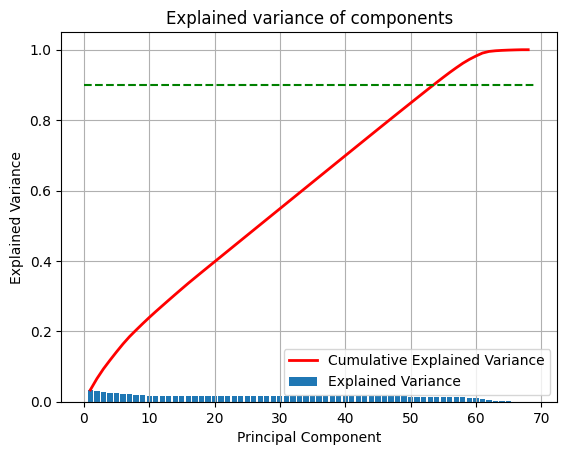

In [235]:
# PCA decomposition
pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots()
x_values = range(1, pca.n_components_ + 1)
ax.bar(x_values,pca.explained_variance_ratio_,lw=2,label="Explained Variance")
ax.plot(x_values,np.cumsum(pca.explained_variance_ratio_),lw=2,label="Cumulative Explained Variance",color="red")
plt.plot([0,pca.n_components_+1],[0.9,0.9],"g--")

ax.set_title("Explained variance of components")
ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance")

plt.legend()
plt.grid()
plt.show()

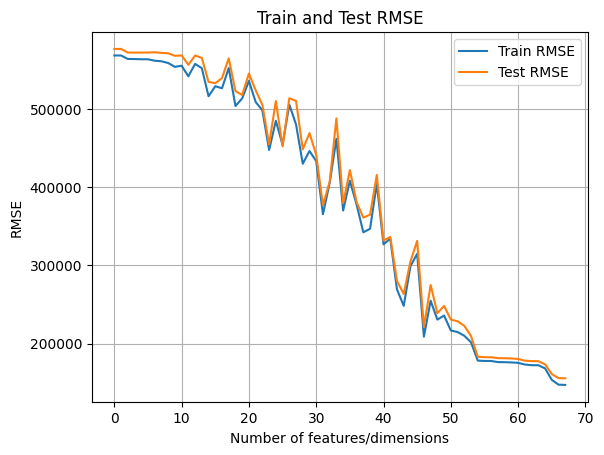

In [236]:
# RMSE from PCA
training_errors = []
test_errors = []

column_count = Train_X_std.shape[1]

for i in range(column_count):
    pca = PCA(n_components= i + 1)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca,Train_y)
    
    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)
    
    training_errors.append(round(np.sqrt(mean_squared_error(Train_y,pred1)),2))
    test_errors.append(round(np.sqrt(mean_squared_error(Test_y,pred2)),2))
    # print("i-> ",i," pca.n_components-> ",pca.n_components, "train/test error->",training_errors[i],test_errors[i])

plt.plot(training_errors,label="Train RMSE")
plt.plot(test_errors,label="Test RMSE")
plt.xlabel("Number of features/dimensions")
plt.ylabel("RMSE")
plt.title("Train and Test RMSE")
plt.legend()
plt.grid()
plt.show()

## Saving data

In [237]:
# from library.sb_utils import save_file
# datapath = "datasets"
# dataframes = [Train_X, Train_X_std, Test_X, Test_X_std, Train_y, Test_y]
# dataframes_str = ["Train_X", "Train_X_std", "Test_X", "Test_X_std", "Train_y", "Test_y"]

# for i in range(len(dataframes)):
#     save_file(dataframes[i],f"{dataframes_str[i]}.csv",datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\Train_X.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\Train_X_std.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\Test_X.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\Test_X_std.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\Train_y.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file. "datasets\Test_y.csv"
